# SGD implementaion on boston dataset

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
print( load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
X.shape

(506, 13)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [14]:
X_sgd1 = pd.DataFrame(X_train)
X_test1 = pd.DataFrame(X_test)

In [23]:
X_sgd = pd.DataFrame(X_train)
X_sgd['price'] = Y_train

In [62]:
import numpy as np

w2 = np.zeros(13)
b2 = 0
r=0.01   
it = 800 # it = no. of iterations
k = 30 # k = batch size
for i in range(it):
    w1 = np.zeros(13)
    b1 = 0
    w_random = w2
    b_random = b2
    df_sample=X_sgd.sample(k)
    x=np.array(df_sample.drop('price',axis=1))
    y=np.array(df_sample['price'])
    for i in range(k):
        w1+=(-2)*x[i]*(y[i]-(np.dot(w_random,x[i])+b_random))
        #print(w1)
        b1+=(-2)*(y[i]-(np.dot(w_random,x[i])+b_random))
        #print(b1)
    w2 = (w_random - r*(w1/k))
    b2 = (b_random - r*(b1/k))
    #r=r/2
print(w2) 
print(b2)
   

[-0.98190447  0.97199348 -0.3877976   0.59501341 -1.68962218  2.74827702
 -0.51468686 -3.13985877  1.52201894 -1.04734195 -2.20371533  0.59356596
 -3.34538858]
22.833532692630925


In [63]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
def predict_plot(x , w, b):
    Y_pred = []
    for i in range(len(x)):
        h = np.dot(w , x[i]) + b
        #print(h)
        Y_pred.append(h)
    mse = mean_squared_error (Y_test ,Y_pred)
    plt.scatter(Y_test,Y_pred)
    return mse   

26.75342027972301

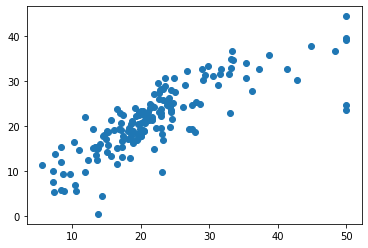

In [64]:
a = predict_plot( x = X_test , w=w2, b=b2)
a

In [65]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor()
clf.fit(X_sgd1, Y_train)
Y_pred = clf.predict(X_test1)
W = clf.coef_

In [66]:
W

array([-0.95422539,  1.02740753, -0.2700045 ,  0.65177238, -1.70197187,
        2.6460958 , -0.41102558, -3.08430468,  1.46022829, -1.1244318 ,
       -2.28502745,  0.51606674, -3.59642278])

mean squared error =  27.074682149001294


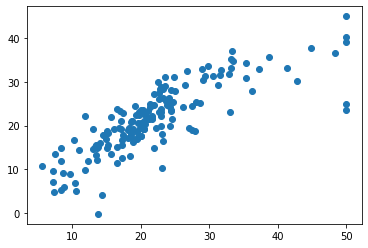

In [67]:
mse1 = mean_squared_error(Y_test , Y_pred)
print("mean squared error = ", mse1)
plt.scatter(Y_test,Y_pred)

In [68]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names=['Weight vector manual','Weight vector SGD sklearn']
for i in range(13):
    x.add_row([w2[i],W[i]])
print(x)
print("")
y = PrettyTable()
y.field_names=['mse manual','mse sgd sklearn']
y.add_row([a , mse1])
print(y)

+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -0.9819044689547989  |    -0.9542253930839948    |
|  0.971993482986504   |     1.0274075256475663    |
| -0.3877976030989595  |    -0.2700044960758244    |
|  0.5950134066671307  |     0.6517723816748026    |
| -1.6896221758123884  |     -1.701971868037117    |
|  2.7482770162701096  |     2.6460958025568133    |
| -0.5146868558540071  |    -0.4110255846232721    |
|  -3.139858772695699  |    -3.0843046837730688    |
|  1.5220189420678059  |     1.4602282852969715    |
|  -1.047341949704604  |    -1.1244318038049992    |
| -2.2037153342774256  |    -2.2850274548558374    |
|  0.5935659551128699  |      0.51606673960296     |
| -3.3453885797780205  |    -3.5964227836019687    |
+----------------------+---------------------------+

+-------------------+--------------------+
|     mse manual    |  mse sgd sklearn   |
+-----------

Conclusion: 

1.Used batch size = 30 and iterations = 800 for manual sgd implementation

2.Mean squared error is pretty same for manual sgd and sklearn sgd